Training with Sigmoid activation function
Training with Tanh activation function
Training with ReLU activation function


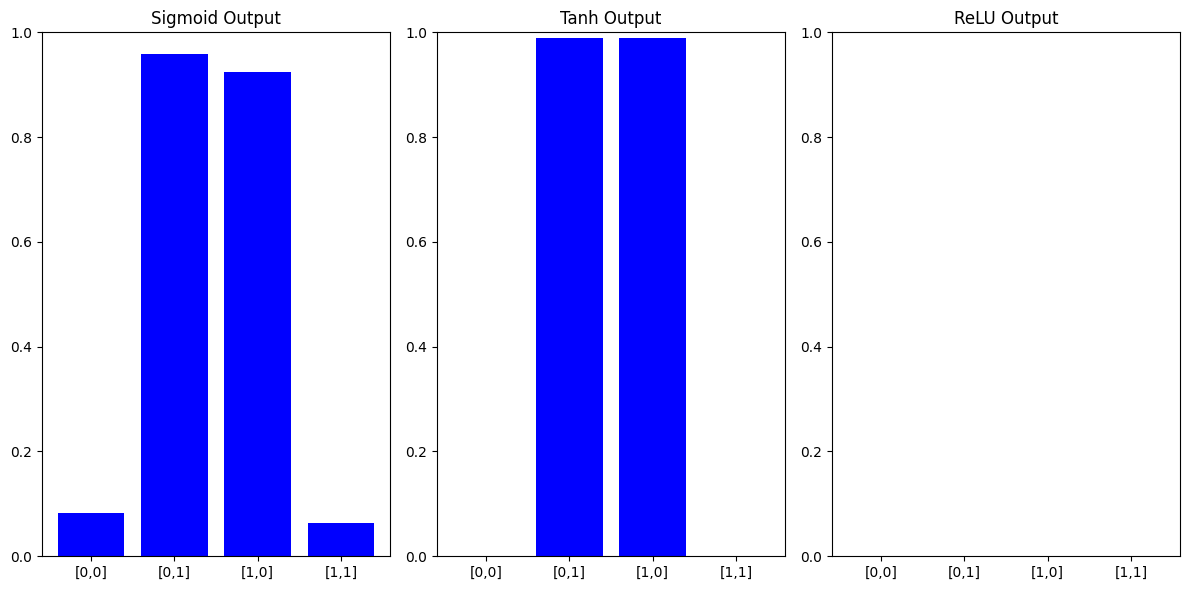

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Simple feedforward neural network for one hidden layer
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function, activation_derivative):
        # Initialize weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

    def feedforward(self, inputs):
        # Calculate the input to the hidden layer
        self.hidden_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_output = self.activation_function(self.hidden_input)
        
        # Calculate the output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output)
        self.output = self.activation_function(self.output_input)
        return self.output

    def train(self, inputs, targets, learning_rate=0.1, epochs=10000):
        for epoch in range(epochs):
            # Feedforward
            output = self.feedforward(inputs)
            
            # Calculate the error
            error = targets - output
            
            # Backpropagation (Gradient Descent)
            output_error_term = error * self.activation_derivative(self.output_input)
            hidden_error_term = np.dot(output_error_term, self.weights_hidden_output.T) * self.activation_derivative(self.hidden_input)
            
            # Update weights
            self.weights_hidden_output += np.dot(self.hidden_output.T, output_error_term) * learning_rate
            self.weights_input_hidden += np.dot(inputs.T, hidden_error_term) * learning_rate

# Generate a simple dataset (XOR problem)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])  # XOR output

# Compare different activation functions
activations = {
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "Tanh": (tanh, tanh_derivative),
    "ReLU": (relu, relu_derivative)
}

# Training the neural networks with different activations
results = {}

for name, (activation, derivative) in activations.items():
    print(f"Training with {name} activation function")
    
    # Initialize neural network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1,
                             activation_function=activation, activation_derivative=derivative)
    
    # Train the network
    nn.train(inputs, targets, learning_rate=0.1, epochs=10000)
    
    # Test the network
    predictions = nn.feedforward(inputs)
    results[name] = predictions

# Plot the results
plt.figure(figsize=(12, 6))
for i, (name, output) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    plt.bar(range(4), output.flatten(), color='blue')
    plt.ylim(0, 1)
    plt.title(f'{name} Output')
    plt.xticks(range(4), ['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
plt.tight_layout()
plt.show()
